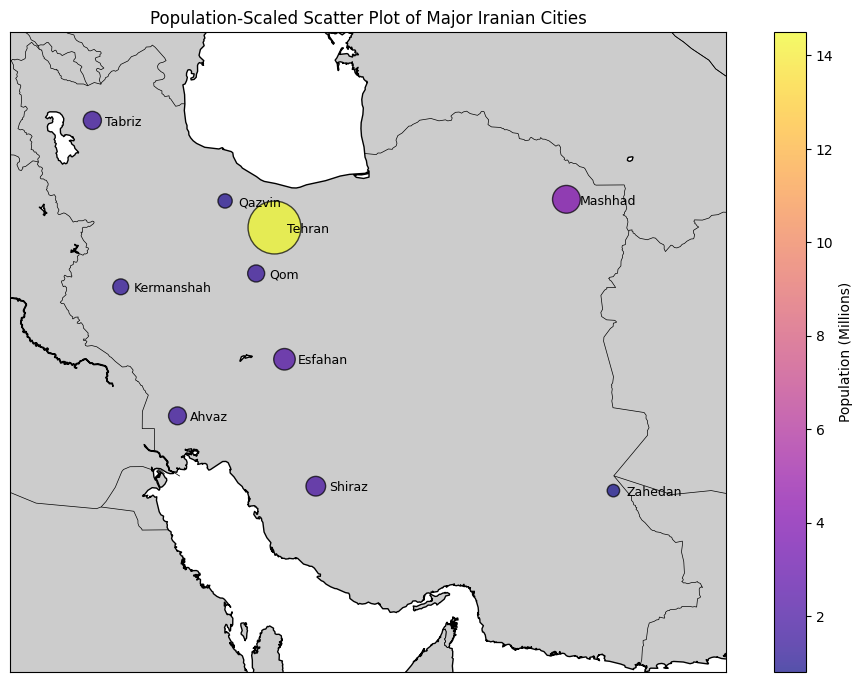

In [4]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


dataset = pd.read_excel("Iran-Cities.xlsx")
dataset.to_csv("Iran-Cities", index=False)


fig=plt.figure(figsize=(12, 8))
ax=fig.add_axes([0.1,0.1,0.8,0.8])


m = Basemap(llcrnrlon=44,llcrnrlat=25,urcrnrlon=64,urcrnrlat=40,
            resolution='i',projection='merc',
            lat_0=32.5, lon_0=53.5)

x, y = m(dataset["Longitude"].values, dataset["Latitude"].values)
population = dataset["Population"]


m.drawcoastlines()
m.fillcontinents()
m.drawcountries()
m.drawcounties()


scatter = m.scatter(
    x, y, 
    s=population*100, 
    c=population, 
    cmap='plasma',         
    edgecolor='black', 
    alpha=0.7
)
cbar = plt.colorbar(scatter)
cbar.set_label('Population (Millions)')



for i, city in enumerate(dataset["City"]):
    plt.text(x[i]+40000, y[i]+16000, city, fontsize=9, ha='left', va='top')

ax.set_title("Population-Scaled Scatter Plot of Major Iranian Cities")
plt.show()